In [5]:
import pandas as pd

In [6]:
df = pd.read_excel('LEPRA_Foot_Meaurement_Form Revised.xlsx')

In [7]:
df.head()

,State,Footwear,Footwear/Leprosy,Patient Age,Patient Gender,Grade,Diabeties,Length of Foot Right,Length of Foot Left,Ball Girth Right,Ball Girth Left,In Step Right,In Step Left,Height of Malleoli Right,Height of Malleoli Left,Height of Malleoli Right.1,Height of Malleoli Left.1
0,Telangana,Leprosy,1,68,Male,Grade II,No,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,Telangana,Lymphatic Filariasis (LF),0,56,Male,Grade I,No,12.0,19.0,26.0,23.0,29.0,25.0,6.0,6.0,6.0,6.0
2,Telangana,Leprosy,1,65,Female,Grade I,No,14.0,18.0,19.0,20.0,30.0,24.0,8.0,8.0,8.0,8.0
3,Telangana,Leprosy,1,53,Female,Grade I,No,15.0,19.0,25.0,21.0,29.0,23.0,8.0,8.0,6.0,6.0
4,Telangana,Leprosy,1,68,Female,Grade II,No,16.0,20.0,19.0,19.0,18.0,21.0,5.0,5.0,5.0,5.0


In [8]:
print(df.isnull().sum())

State                          0
Footwear                       0
Footwear/Leprosy               0
Patient Age                    0
Patient Gender                 0
Grade                          4
Diabeties                      4
Length of Foot Right          11
Length of Foot Left           10
Ball Girth Right              11
Ball Girth Left               12
In Step Right                 11
In Step Left                  13
Height of Malleoli Right      10
Height of Malleoli Left       10
Height of Malleoli Right.1    10
Height of Malleoli Left.1     12
dtype: int64


In [9]:
df.shape

(729, 17)

In [10]:
df = df.drop(['State', 'Footwear','Height of Malleoli Right', 'Height of Malleoli Left',
       'Height of Malleoli Right.1', 'Height of Malleoli Left.1'], axis=1)

In [11]:
df['Grade'] = df['Grade'].fillna(df['Grade'].mode()[0])

In [12]:
df['Diabeties'] = df['Diabeties'].fillna(df['Diabeties'].mode()[0])

In [13]:
for col in ['Length of Foot Right', 'Length of Foot Left', 'Ball Girth Right', 'Ball Girth Left', 'In Step Right', 'In Step Left']:
  df[col] = df[col].fillna(df[col].median())

In [14]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=categorical_cols)
display(df.head())

,Footwear/Leprosy,Patient Age,Length of Foot Right,Length of Foot Left,Ball Girth Right,Ball Girth Left,In Step Right,In Step Left,Patient Gender_Female,Patient Gender_Male,Grade_Grade I,Grade_Grade II,Diabeties_No,Diabeties_Yes
0,1,68,3.0,3.0,3.0,3.0,3.0,3.0,False,True,False,True,True,False
1,0,56,12.0,19.0,26.0,23.0,29.0,25.0,False,True,True,False,True,False
2,1,65,14.0,18.0,19.0,20.0,30.0,24.0,True,False,True,False,True,False
3,1,53,15.0,19.0,25.0,21.0,29.0,23.0,True,False,True,False,True,False
4,1,68,16.0,20.0,19.0,19.0,18.0,21.0,True,False,False,True,True,False


In [15]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])
display(df_scaled.head())

,Footwear/Leprosy,Patient Age,Length of Foot Right,Length of Foot Left,Ball Girth Right,Ball Girth Left,In Step Right,In Step Left,Patient Gender_Female,Patient Gender_Male,Grade_Grade I,Grade_Grade II,Diabeties_No,Diabeties_Yes
0,0.432778,1.131171,-2.29617,-7.986654,-0.268243,-0.216097,-0.250061,-5.086343,False,True,False,True,True,False
1,-2.310656,0.239043,-1.35495,-2.070088,0.001448,-0.050087,0.009362,0.200764,False,True,True,False,True,False
2,0.432778,0.908139,-1.14579,-2.439873,-0.080632,-0.074989,0.019340,-0.039559,True,False,True,False,True,False
3,0.432778,0.016011,-1.04121,-2.070088,-0.010278,-0.066688,0.009362,-0.279882,True,False,True,False,True,False
4,0.432778,1.131171,-0.93663,-1.700303,-0.080632,-0.083289,-0.100394,-0.760529,True,False,False,True,True,False


In [16]:
import numpy as np
for i in df.select_dtypes(include = np.number).columns[:-1]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
    print(df.shape)

(614, 14)
(613, 14)
(570, 14)
(551, 14)
(512, 14)
(499, 14)
(486, 14)


In [17]:
df.describe()

,Footwear/Leprosy,Patient Age,Length of Foot Right,Length of Foot Left,Ball Girth Right,Ball Girth Left,In Step Right,In Step Left
count,486.0,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,1.0,53.510288,25.045267,25.028807,23.668724,23.769547,24.868313,25.045267
std,0.0,13.593923,1.795185,1.786315,2.024420,2.153008,2.158451,2.385957
min,1.0,16.000000,21.000000,21.000000,18.000000,18.000000,19.000000,18.000000
25%,1.0,45.000000,24.000000,24.000000,22.000000,22.000000,23.000000,23.000000
50%,1.0,55.000000,25.000000,25.000000,24.000000,24.000000,25.000000,25.000000
75%,1.0,65.000000,26.000000,26.000000,25.000000,25.000000,26.000000,27.000000
max,1.0,84.000000,29.000000,29.000000,29.000000,29.000000,30.000000,33.000000


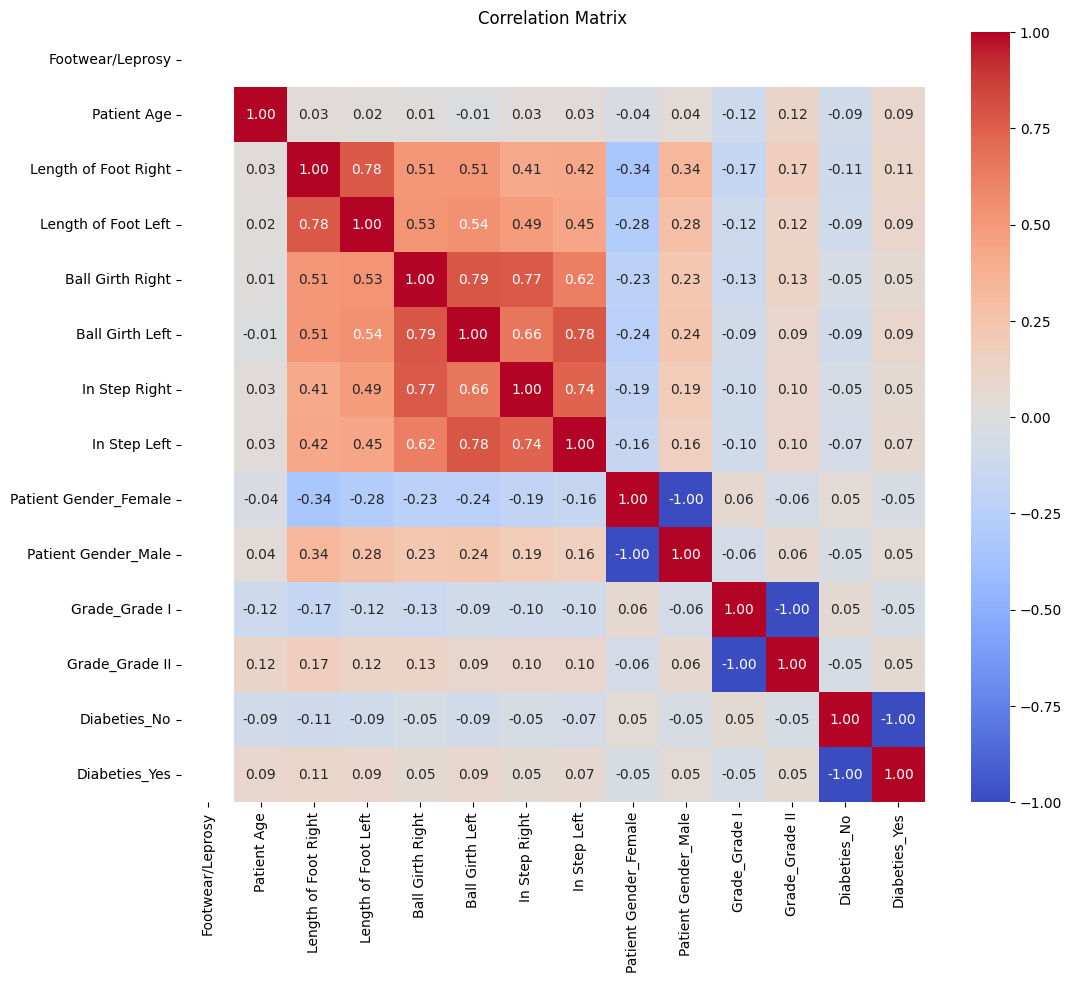

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
X = df[["Patient Age", "Patient Gender_Female", "Patient Gender_Male", "Grade_Grade I", "Grade_Grade II", "Diabeties_No", "Diabeties_Yes"]]   # input features
# Targets (output measurements)
y = df[[
    "Length of Foot Left",
    "Length of Foot Right",
    "Ball Girth Left",
    "Ball Girth Right",
    "In Step Left",
    "In Step Right"
]]

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (486, 7)
y shape: (486, 6)


In [23]:
# Fit regression
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
# Predict
y_pred = model.predict(X_test)

In [25]:
# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 3.727434234220009
R²: 0.08333711408683103


In [26]:
import joblib

joblib.dump(model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']